# Part I - (Ford go Bike tripdata)
## by (MUHAMMAD BELLO YAHAYA)

## Introduction
> The investigation is on Ford go Bike tripdata for the year 2019


## Content
<ul>
    <li>Preliminary Wrangling</li>
    <li>Univariate Exploration</li>
    <li>Bivariate Exploration</li>
    <li>Multivariate Exploration</li>
    <li>Reference</li>
</ul>

## Preliminary Wrangling


In [270]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [271]:
#Load the dataset to work with

df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [272]:
#Display the first 5 records

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,2,Feb,17,afternoon,3,Thu,33.0
1,385,2019-02-28 23:49:24.399,2019-02-28 23:55:50.2840,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,2000.0,Male,No,2,Feb,23,night,3,Thu,17.0
2,1066,2019-02-28 23:31:16.139,2019-02-28 23:49:02.7920,58.0,Market St at 10th St,37.776619,-122.417385,145.0,29th St at Church St,37.743684,...,1992.0,Female,No,2,Feb,23,night,3,Thu,25.0
3,1554,2019-02-28 23:20:24.089,2019-02-28 23:46:19.0190,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,...,1972.0,Male,No,2,Feb,23,night,3,Thu,45.0
4,401,2019-02-28 23:30:52.471,2019-02-28 23:37:33.9550,58.0,Market St at 10th St,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,...,1990.0,Female,No,2,Feb,23,night,3,Thu,27.0


In [273]:
#Get the total number of records in the file

df.shape

(23650, 23)

In [274]:

df.describe

<bound method NDFrame.describe of        duration_sec               start_time                  end_time  \
0             52185  2019-02-28 17:32:10.145  2019-03-01 08:01:55.9750   
1               385  2019-02-28 23:49:24.399  2019-02-28 23:55:50.2840   
2              1066  2019-02-28 23:31:16.139  2019-02-28 23:49:02.7920   
3              1554  2019-02-28 23:20:24.089  2019-02-28 23:46:19.0190   
4               401  2019-02-28 23:30:52.471  2019-02-28 23:37:33.9550   
...             ...                      ...                       ...   
23645           932  2019-02-01 01:07:51.908  2019-02-01 01:23:24.3700   
23646           932  2019-02-01 01:07:49.971  2019-02-01 01:23:22.5280   
23647           196  2019-02-01 01:08:38.641  2019-02-01 01:11:54.9490   
23648           958  2019-02-01 00:12:24.247  2019-02-01 00:28:22.7380   
23649           313  2019-02-01 00:05:34.744  2019-02-01 00:10:48.5020   

       start_station_id                                 start_station_name  \

### The structure of the dataset

> The dataset contains 23650 records
    


### The main feature(s) of interest in the dataset

> The most interested in figuring out when and where are most trips taken because this dataset includes start time/location and end time/location. I focus on the starting points first.
Also, I am interested in what are the characteristics (age, sex, and user_type) of the riders and the duration of the trips in these time points and locations.

### The features in the dataset that i think will help support in investigation for the feature(s) of interest

> I expect the Caltrain or Bart stations in San Francisco will have more trips than other locations because those stations are in the center of the city and connect to other major transportations. Morning and afternoon will have more trips than night time due to rush hours. Also, I assume younger riders are more than older riders because of physical abilities. Moreover, based on the pricing, subscribers are more likely riding more than customers. And it's hard to expect female riders are more or males, so I leave this topic in the analysis.

In [275]:
# 1. Convert time variables from string to datetime
# a. month of the year
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_month_num'] = df['start_time'].apply(lambda time: time.month)
df['start_month_char'] = df['start_month_num'].apply(lambda x: calendar.month_abbr[x])

In [276]:
# Test: take a loo at start_month_num and start_month_char
print(df['start_month_num'].value_counts())
print(df['start_month_char'].value_counts())

2    23650
Name: start_month_num, dtype: int64
Feb    23650
Name: start_month_char, dtype: int64


In [277]:
# b. morning, afternoon, night of a day
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df['period_day'] = 'morning'
df['period_day'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'afternoon'
df['period_day'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'night'


In [278]:
# Test: start hour and time of day
print(df['start_hour'].value_counts())
print(df['period_day'].value_counts())

17    3388
8     3263
9     2623
18    2388
16    1751
7     1338
19    1275
10    1095
13     973
15     948
12     948
11     895
14     815
20     678
6      403
21     377
22     204
23     120
0       66
5       46
1       24
2       20
4        6
3        6
Name: start_hour, dtype: int64
morning      9785
afternoon    8823
night        5042
Name: period_day, dtype: int64


In [279]:
# c. Day of the week
df['start_weekday_num'] = df['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['start_weekday_char'] = df['start_weekday_num'].map(dmap)

In [280]:
# Test: take a look at start_weekday_num and start_weekday_char
print(df['start_weekday_num'].value_counts())
print(df['start_weekday_char'].value_counts())

3    4868
1    4475
2    4037
4    4033
0    3571
5    1433
6    1233
Name: start_weekday_num, dtype: int64
Thu    4868
Tue    4475
Wed    4037
Fri    4033
Mon    3571
Sat    1433
Sun    1233
Name: start_weekday_char, dtype: int64


In [281]:
# convert time period, month, and weekday into ordered categorical types
ordinal_var_dict = {'start_month_char': ['Jan','Feb','Mar','Apr','May','Jun','Jul'],
                    'period_day': ['morning', 'afternoon', 'night'],
                    'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [282]:
# 2. Create ages
df['age'] = df['member_birth_year'].apply(lambda x: 2017 - x)

In [283]:
# Test: age
df['age'].describe()

count    22433.000000
mean        32.763741
std         10.366010
min         16.000000
25%         26.000000
50%         30.000000
75%         38.000000
max        139.000000
Name: age, dtype: float64

## Univariate Exploration

> 

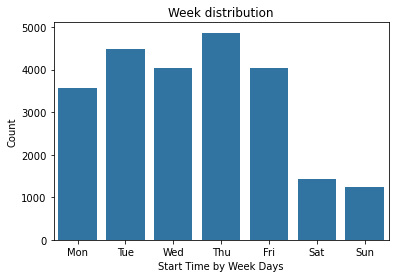

In [284]:
# 1. Time by months 
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_weekday_char', color=base_color)
plt.xlabel('Start Time by Week Days')
plt.ylabel('Count')
plt.title('Week distribution');

In [285]:
#2. Location: start stations. 
print(len(df['start_station_name'].value_counts()))
df['start_station_name'].value_counts()

8


Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2710
San Francisco Caltrain (Townsend St at 4th St)               2703
The Embarcadero at Sansome St                                2082
Name: start_station_name, dtype: int64

In [286]:
# Subset the dataset by keeping only top 8 locations with high traffics, df_top8. 
locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
df_top8 = df.loc[df['start_station_name'].isin(locs)]

In [287]:
# Test and see if only keep top 8 station
df_top8['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2710
San Francisco Caltrain (Townsend St at 4th St)               2703
The Embarcadero at Sansome St                                2082
Name: start_station_name, dtype: int64

In [288]:
# After subsetting top 8 station with the most trip, create a countplot to see the distribution and order from top 1 to top 8
st_stat_counts = df_top8['start_station_name'].value_counts()
st_stat_order = st_stat_counts.index

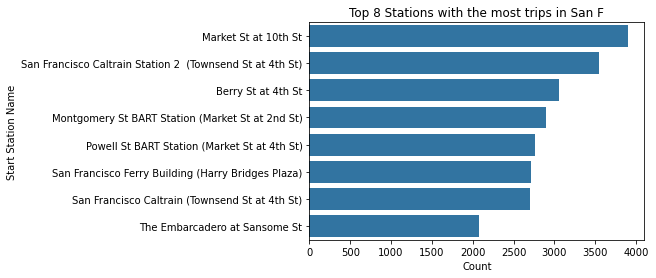

In [289]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_top8, y='start_station_name', color=base_color, order=st_stat_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 8 Stations with the most trips in San F');

After checking start and end stations, most stations in San Francisco connect to public transportations such as Caltrain, Bart and Ferry. The Embarcadero at Sansome St is very closed to Ferry building and located in financial distrit. Market St at 10th St and Berry St at 4th St are also closed to Bart station. I will look into the time factors in these 8 locations.

In [290]:
# 1.1 Time: month (after subsetting, regenerate the distribution of month again), time of day, weekday
mon_cl = ['Jan','Feb','Mar','Apr','May','Jun','Jul']
mon_cl2 = pd.api.types.CategoricalDtype(ordered=True, categories=mon_cl)
df_top8['start_month_char'] = df_top8['start_month_char'].astype(mon_cl2)


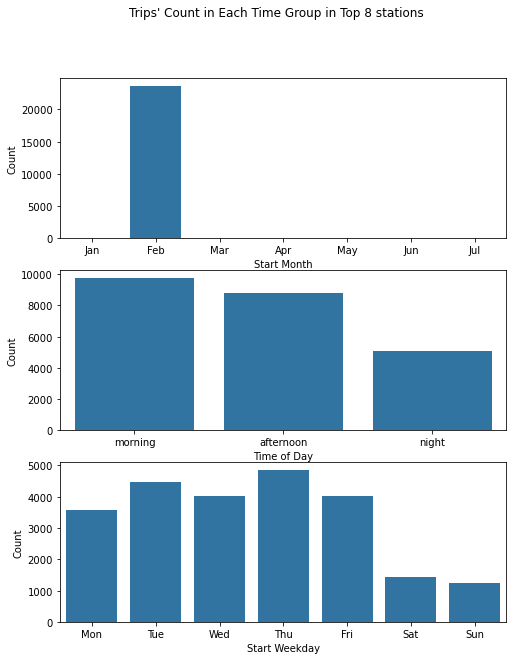

In [291]:
fig, ax = plt.subplots(nrows=3, figsize = [8,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_top8, x = 'start_month_char', color = default_color, ax = ax[0])
sb.countplot(data = df_top8, x = 'period_day', color = default_color, ax = ax[1])
sb.countplot(data = df_top8, x = 'start_weekday_char', color = default_color, ax = ax[2])
ax[0].set_xlabel('Start Month')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Time of Day')
ax[1].set_ylabel('Count')
ax[2].set_xlabel('Start Weekday')
ax[2].set_ylabel('Count')
fig.suptitle('Trips\' Count in Each Time Group in Top 8 stations');

In these top 8 trips stations, base on the above figures, I have the following findings:

The number of trips gradually decreases when winter is coming. I assume that Thursday's trips are influenced by the launch of the program.
During the day, there are more trips in the morning and afternoon than the night. It probably because of rush hours. Also, the number of trips in the afternoon is less than the morning. I assumed when riders come back home, they might not be back in the afternoon. Probably, they come back during the night so some trips fall into nighttime.
It makes sense that there are more trips during the weekdays and less trips during the weekends because of working schedule.

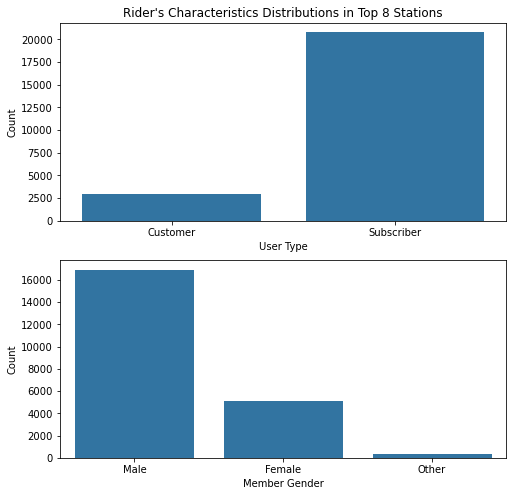

In [292]:
# 3. Rider's characteristics: the distributions of user type and gender
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = df_top8, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = df_top8, x = 'member_gender', color = default_color, ax = ax[1])
ax[0].set_xlabel('User Type')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Member Gender')
ax[1].set_ylabel('Count')
ax[0].set_title('Rider\'s Characteristics Distributions in Top 8 Stations');

In [293]:
# Take a look at the 'Other' group in gender. 
df_top8.query('member_gender == "Other"')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char,age
15,515,2019-02-28 22:28:11.347,2019-02-28 22:36:46.3890,58.0,Market St at 10th St,37.776619,-122.417385,321.0,5th St at Folsom,37.780146,...,1981.0,Other,No,2,Feb,22,night,3,Thu,36.0
127,851,2019-02-28 19:36:45.231,2019-02-28 19:50:57.0650,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,74.0,Laguna St at Hayes St,37.776435,...,1985.0,Other,No,2,Feb,19,night,3,Thu,32.0
135,1484,2019-02-28 19:17:32.459,2019-02-28 19:42:17.3290,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,134.0,Valencia St at 24th St,37.752428,...,1986.0,Other,No,2,Feb,19,night,3,Thu,31.0
165,752,2019-02-28 19:09:18.074,2019-02-28 19:21:50.7520,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,81.0,Berry St at 4th St,37.775880,...,1983.0,Other,No,2,Feb,19,night,3,Thu,34.0
172,398,2019-02-28 19:09:44.294,2019-02-28 19:16:23.2800,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,1985.0,Other,No,2,Feb,19,night,3,Thu,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23094,518,2019-02-01 13:30:35.339,2019-02-01 13:39:13.5760,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,58.0,Market St at 10th St,37.776619,...,1988.0,Other,No,2,Feb,13,afternoon,4,Fri,29.0
23125,324,2019-02-01 12:44:28.223,2019-02-01 12:49:52.7190,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,321.0,5th St at Folsom,37.780146,...,1981.0,Other,No,2,Feb,12,afternoon,4,Fri,36.0
23151,499,2019-02-01 12:05:01.631,2019-02-01 12:13:20.6360,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,58.0,Market St at 10th St,37.776619,...,1989.0,Other,No,2,Feb,12,afternoon,4,Fri,28.0
23175,1260,2019-02-01 11:24:29.535,2019-02-01 11:45:30.3980,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,27.0,Beale St at Harrison St,37.788059,...,1974.0,Other,Yes,2,Feb,11,morning,4,Fri,43.0


In these top 8 trips stations, base on the above figures, I have the following findings:

It makes sense that there are more subscribers than customers. Based on the pricing page, daily membership only takes 15 dollars. For regular customers, one trip takes 2 dollars and one day takes 10 dollars. If riders are commuters or long-term users, it does not make sense for them to choose one time or two time purchases instead of being the members.
For the gender groups, the number of trips in male riders is 3 times more than the number of trips in females. Why is that? I will investigate this more in the following.
There are few riders with 'Other' gender. It's not clear that the riders are not willing to reveal or there are data entry issues.

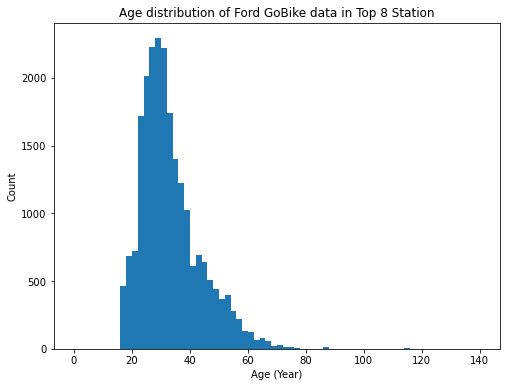

In [294]:
# 4. Age: based on the distribution, we can tell it's right skewed and has some outliers between 100 and 120.
plt.figure(figsize=(8,6))
bins = np.arange(0, df_top8['age'].max()+2, 2)
plt.hist(data=df_top8, x='age', bins=bins)
plt.xlabel('Age (Year)')
plt.ylabel('Count')
plt.title('Age distribution of Ford GoBike data in Top 8 Station');

In [295]:
df_top8['age'].describe()

count    22433.000000
mean        32.763741
std         10.366010
min         16.000000
25%         26.000000
50%         30.000000
75%         38.000000
max        139.000000
Name: age, dtype: float64

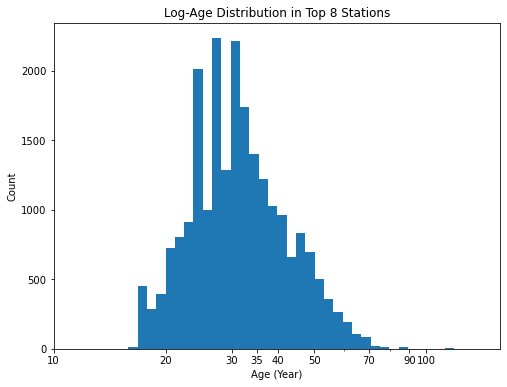

In [296]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df_top8['age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = df_top8, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.xlabel('Age (Year)')
plt.ylabel('Count')
plt.title('Log-Age Distribution in Top 8 Stations');

From the figure, most of riders are around 30 years old. Even though there are some riders ages older than 90 years old looks like high outliers, before checking their physical abilities data, I will keep them in the dataset.

In [297]:
# There are some bikers with age older than 100 years old. Let's take a look at them.
df_top8.query('age > 100')


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char,age
2961,701,2019-02-26 09:06:11.239,2019-02-26 09:17:52.4420,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,9.0,Broadway at Battery St,37.798572,...,1900.0,Male,No,2,Feb,9,morning,1,Tue,117.0
3792,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.0680,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,...,1878.0,Female,No,2,Feb,9,morning,0,Mon,139.0
5159,539,2019-02-22 18:46:15.403,2019-02-22 18:55:15.0530,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,25.0,Howard St at 2nd St,37.787522,...,1901.0,Male,No,2,Feb,18,night,4,Fri,116.0
12424,418,2019-02-15 08:23:25.306,2019-02-15 08:30:24.1320,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,26.0,1st St at Folsom St,37.787290,...,1902.0,Female,No,2,Feb,8,morning,4,Fri,115.0
14728,543,2019-02-12 09:12:25.266,2019-02-12 09:21:28.5810,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,26.0,1st St at Folsom St,37.787290,...,1902.0,Female,No,2,Feb,9,morning,1,Tue,115.0
15953,562,2019-02-11 09:36:13.876,2019-02-11 09:45:36.8060,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,26.0,1st St at Folsom St,37.787290,...,1902.0,Female,No,2,Feb,9,morning,0,Mon,115.0
17694,372,2019-02-08 08:22:24.741,2019-02-08 08:28:37.1260,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,26.0,1st St at Folsom St,37.787290,...,1902.0,Female,No,2,Feb,8,morning,4,Fri,115.0
18757,508,2019-02-07 09:34:11.542,2019-02-07 09:42:40.4000,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,26.0,1st St at Folsom St,37.787290,...,1902.0,Female,No,2,Feb,9,morning,3,Thu,115.0
19368,727,2019-02-06 18:24:40.310,2019-02-06 18:36:48.1830,81.0,Berry St at 4th St,37.775880,-122.393170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,...,1910.0,Other,No,2,Feb,18,night,2,Wed,107.0


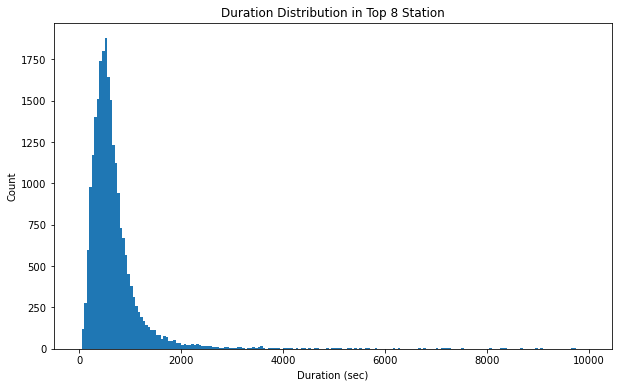

In [298]:
# 5. The distribution of duration of trips
plt.figure(figsize=(10,6))
#bins = np.arange(0, df_top8_le100['duration_sec'].max()+50, 100)
bins = np.arange(0, 10000, 50)
plt.hist(data=df_top8, x='duration_sec', bins=bins)
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Duration Distribution in Top 8 Station');

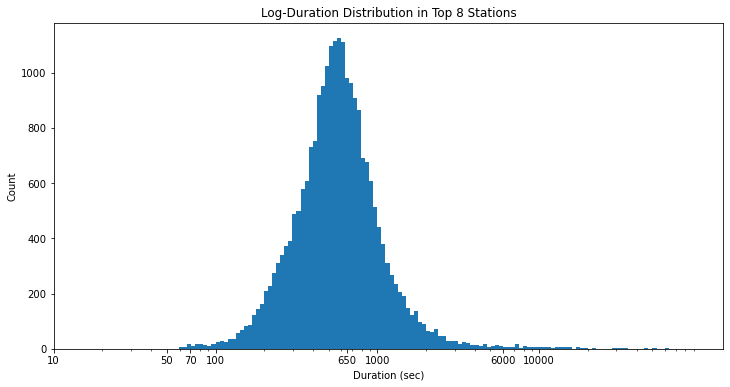

In [299]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df_top8['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 6])
plt.hist(data = df_top8, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10,50,70,100,650,1000,6000,10000], [10,50,70,100,650,1000,6000,10000])
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Log-Duration Distribution in Top 8 Stations');

In [300]:
# Only use the subsetted dataset to perform the rest of analysis.
df_top8.to_csv("201902-fordgobike-tripdata-clean.csv", index=False)


Transformations 

The variables, age and duration_sec, look like right skewed, so I look into these two variables using a log transform. Under the transformations, age's data has one big peak between 30 and 40 years old and some small peak. Duration's data looks like unimodel with one peak between 550 and 650 seconds.

# Bivariate Exploration

In [301]:
# Prepare lists of numeric variables and categorical variables
numeric_vars = ['age','duration_sec']
times_chr = ['period_day','start_weekday_char','start_month_char']
users_chr = ['user_type','member_gender']

In [302]:
# Order top 8 stations from the number one (most trips) to the number eight (least trips)
loc_cl = locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
loc_cl2 = pd.api.types.CategoricalDtype(ordered=True, categories=loc_cl)
df_top8['start_station_name'] = df_top8['start_station_name'].astype(loc_cl2)

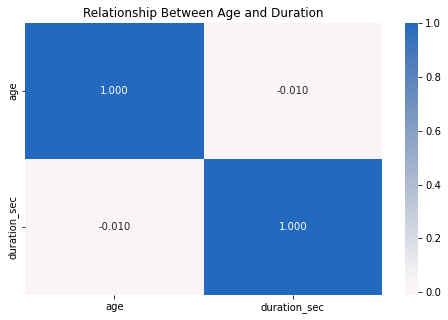

In [303]:
# 1. Numeric variables: correlation between age and duration second
plt.figure(figsize = [8, 5])
sb.heatmap(df_top8[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration');

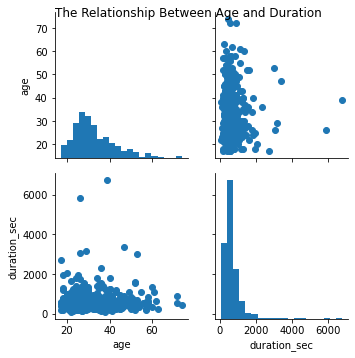

In [304]:
# plot matrix for age and duration: sample 500 so that plots are clearer. 
samples = np.random.choice(df_top8.shape[0], 500, replace = False)
df_top8_samp = df_top8.loc[samples,:]

g = sb.PairGrid(data = df_top8_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)
g.fig.suptitle('The Relationship Between Age and Duration');

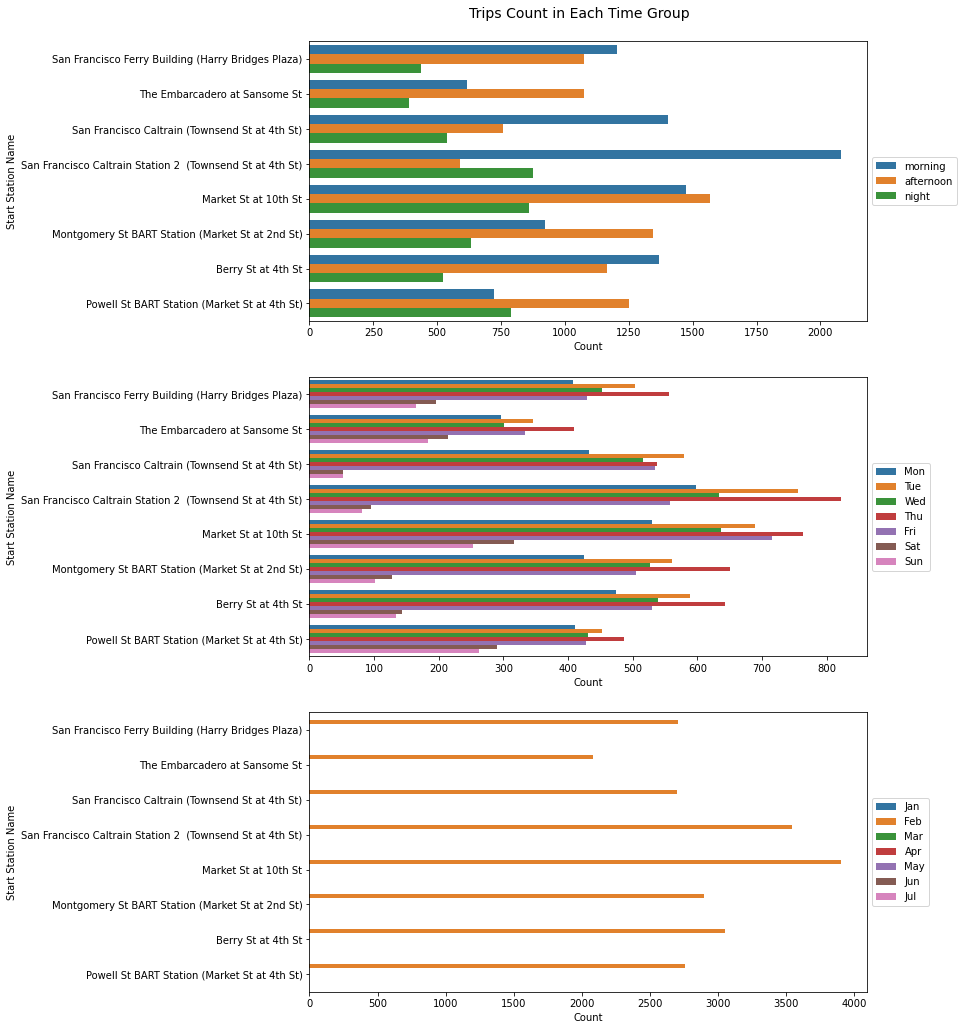

In [305]:
# 2. Categorical variables by plotting countplot: top 8 stations by times (time of day, weekdays, months)
fig = plt.figure(figsize=(10,16))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Time Group', fontsize=14)
for i in range(1, 4):
    ax = fig.add_subplot(3, 1, i)
    sb.countplot(data=df_top8, y='start_station_name', hue=times_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');

After breaking down into each station,

Time of day: morning is not necessary the period of time with most trips. Half of stations have the most trips during the morning and another half of stations has the most trips during the afternoon. It needs to be investigated more.
Day of week: weekdays (Monday, Tuesday, Wednesday, Thursday and Friday) have the most trips than weekends. Compared to other weekdays, Friday has less trips. I think that some people work from home on Friday like me ;p. Some stations' weekends have more trips than other stations (even their trips are still less than weekdays') might because these stations are close to tourist attractions. But all of points need to be taken a deeper look.

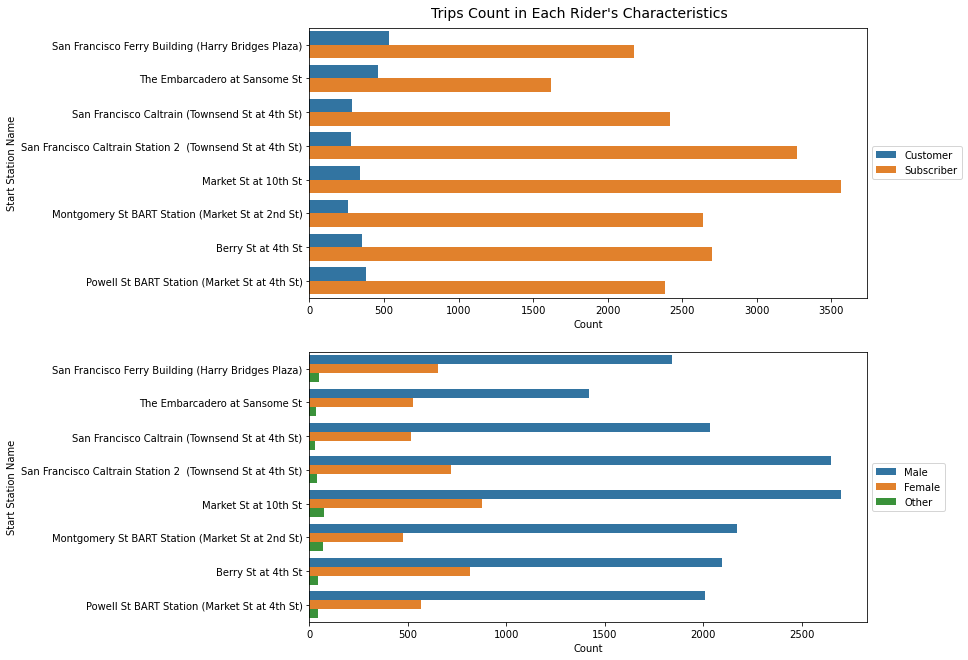

In [306]:
# 3. Categorical variables by plotting countplot: top 8 stations by users' attributes (user_type, member's gender)
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Rider\'s Characteristics' , fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=df_top8, y='start_station_name', hue=users_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');

After breaking down into top 8 station by users' attributes:

Apparently, subscribers are more than customers in each station. However, there are more customers at San Francisco Ferry Building (Harry Bridges Plaza) and The Embarcadero at Sansome St stations than at other stations. Customers might include tourists.
The trips in male riders are way more than in females. Even though I look into the gender distribution in SF. It cannot explain why males riders are more. It needs to be investigated deeper.

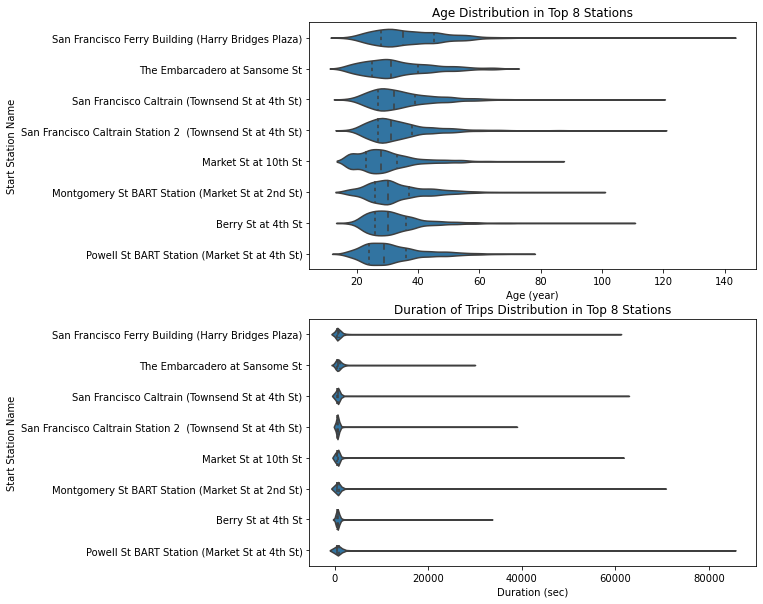

In [307]:
# 4. Numeric variables by plotting violin plot to see the distributions: 
# Top 8 stations by age, Top 8 stations by duration of trips
plt.figure(figsize=(8,10))
base_color = sb.color_palette()[0]
ax = plt.subplot(211)
sb.violinplot(data=df_top8, y='start_station_name', x='age', inner='quartile', color=base_color)
plt.xlabel('Age (year)')
plt.ylabel('Start Station Name')
plt.title('Age Distribution in Top 8 Stations')

ax = plt.subplot(212)
sb.violinplot(data=df_top8, y='start_station_name', x='duration_sec', inner='quartile',color=base_color)
plt.xlabel('Duration (sec)')
plt.ylabel('Start Station Name')
plt.title('Duration of Trips Distribution in Top 8 Stations');

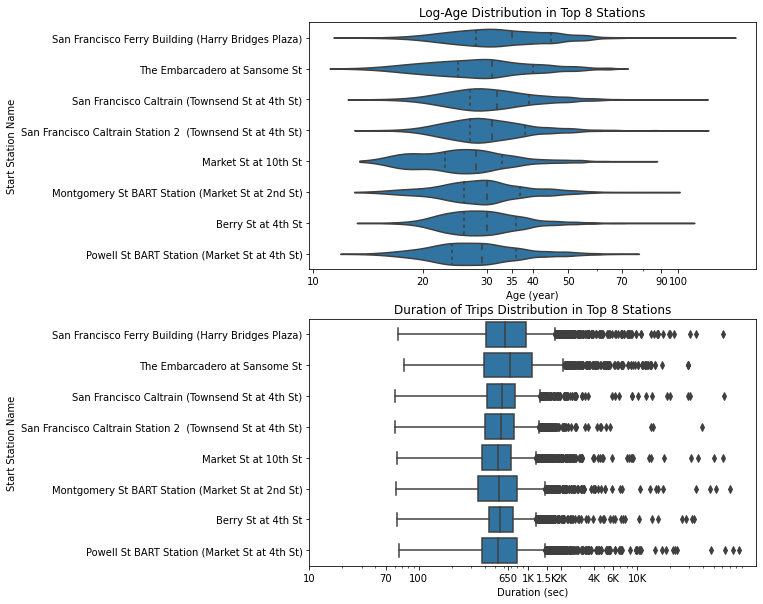

In [308]:
# It looks like the majority of data squeeze in the first half of plots. Let's see log transform.
# For duration of trips: avoid messiness of violin plots, I plot boxplots instead.
plt.figure(figsize=(8,10))
base_color = sb.color_palette()[0]
ax = plt.subplot(211)
sb.violinplot(data=df_top8, y='start_station_name', x='age', inner='quartile', color=base_color)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.ylabel('Start Station Name')
plt.xlabel('Age (year)')
plt.title('Log-Age Distribution in Top 8 Stations')

ax = plt.subplot(212)
sb.boxplot(data=df_top8, y='start_station_name', x='duration_sec',color=base_color)
plt.xscale('log')
plt.xticks([10,50,100,650,1000,1500,2000,4000,6000,10000], [10,70,100,650,'1K','1.5K','2K','4K','6K','10K'])
plt.xlabel('Duration (sec)')
plt.ylabel('Start Station Name')
plt.title('Duration of Trips Distribution in Top 8 Stations');

In [309]:
# Check high outliers in duration of trips
len(df_top8.query('duration_sec > 1500')['duration_sec'])/len(df_top8['duration_sec'])

0.05386892177589852

After log-transformed, most of median age population (between 30 to 40) is consistent in each station. The median of duration (second) falls around 650 second. However, after 1500 second, there are a lot of high outliers around 9.9%.

### Observed relationships in bivariate exploration.

> In the top 8 stations, look into the attributes' times and users:
Time: After separating into eight stations, morning is not necessary the one with most trips. But half of stations has the most trips in the morning and another half of stations has the most trips in the afternoon. There are more trips during the weekdays than in weekends. However, in customers, some stations like San Francisco Ferry Building (Harry Bridges Plaza) and The Embarcadero at Sansome St stations have more trips than others in the weekend. Will tourist attractions be another feature causing more trips? Also, compared to other weekdays, Friday has slightly less than trips. I am guessing probably more people work from home that day instead of being in the office like me.
User:
Age: most of age population falls between 30 and 40 years old. It might imply there are full time employees and commuters.
Gender: the number of trips in males is way more than the number in females. It needs to be investigated more.
Subscribe: the number of trips in subscribers is more than the number in customers because of pricing and population.



### Any interesting relationships between the other features

> Age and duration of trips are slightly negative-correlated. Majority of age population locates between 30 and 40 years old, so it is probably the reason that other age groups are not observed.

## Multivariate Exploration

> 

In [310]:
# (1) Top 8 trip stations by times: separate user types and take a look customers and subscribers individually
df_cust = df_top8.query('user_type == "Customer"')

In [311]:
df_sub = df_top8.query('user_type == "Subscriber"')

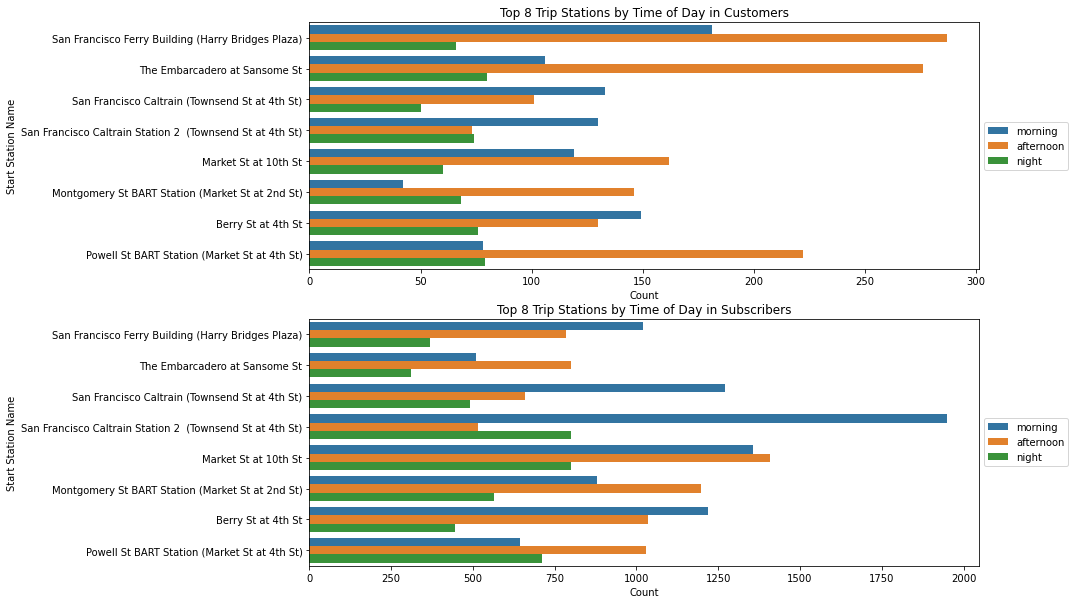

In [312]:
# 1. 3 categorical variables using countplot: time of day: morning, afternoon, night between customers and subscribers
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Time of Day in Customers')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Time of Day in Subscribers')
plt.xlabel('Count')
plt.ylabel('Start Station Name');


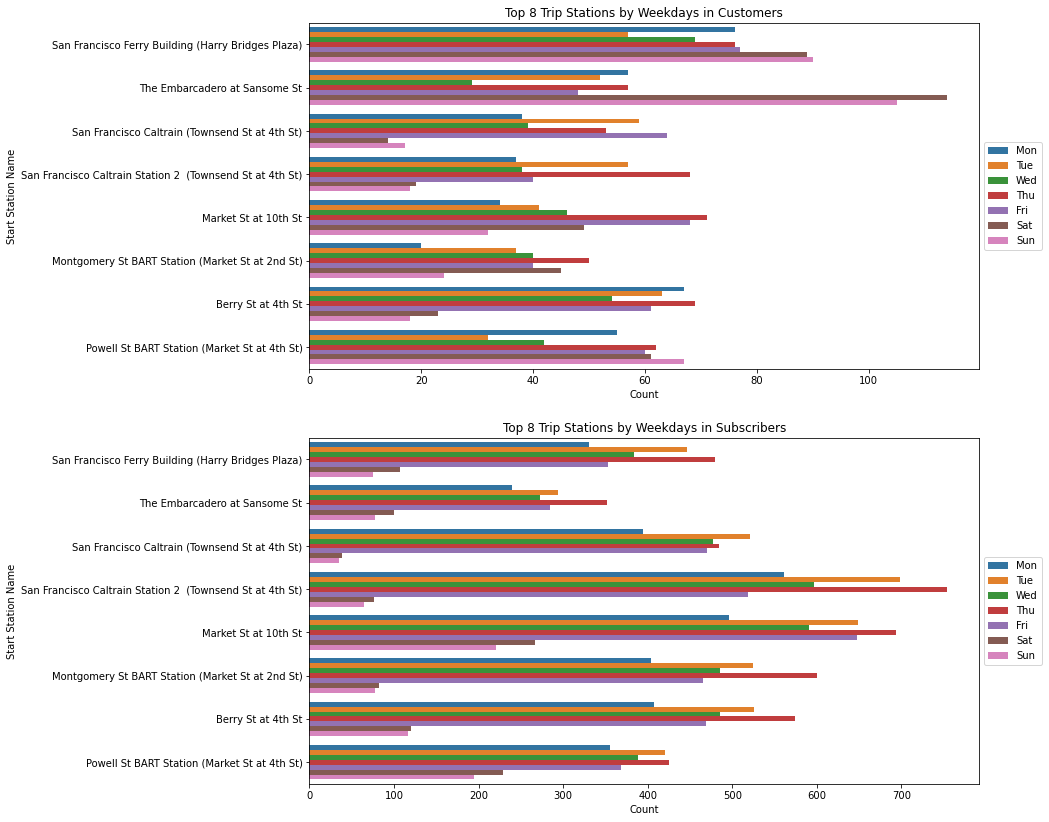

In [313]:
# 2. 3 categorical variables using countplot: Weekday between customers and subscribers
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Weekdays in Customers')
plt.ylabel('Start Station Name')
plt.xlabel('Count')

ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Weekdays in Subscribers')
plt.ylabel('Start Station Name')
plt.xlabel('Count');

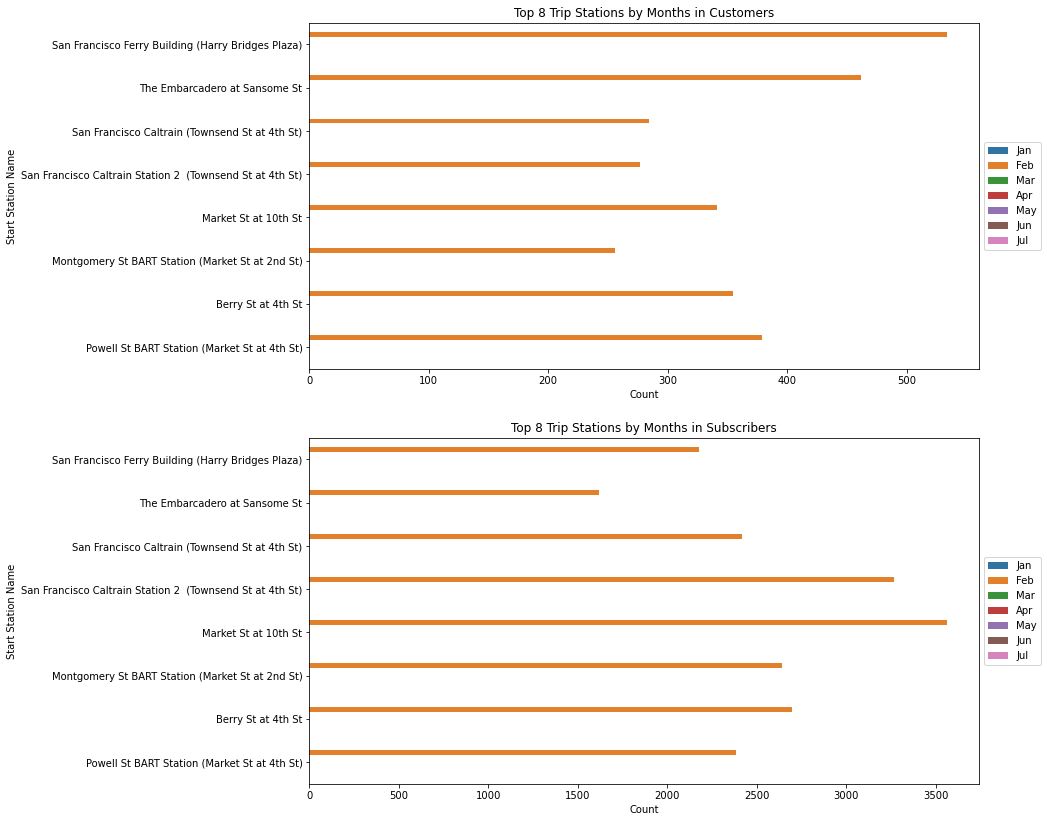

In [314]:
# 3. 3 categorical variables using countplot: Month between customers and subscribers
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='start_month_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Months in Customers')
plt.ylabel('Start Station Name')
plt.xlabel('Count')

ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='start_month_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Months in Subscribers')
plt.ylabel('Start Station Name')
plt.xlabel('Count');

After separating customers from subscribers, there are some very interesting findings in these 3 time categorical variables.

Time of Day: there are more trips in the morning or afternoon no matter in customers or subscribers.
Weekdays: it implies customers probably includes tourists because most trips happen in the weekend. On the other hand, subscribers imply commuters because most trips happen in the weekdays.

In [315]:
# Let's take a look at gender groups in time and locations
df_f = df_top8.query('member_gender == "Female"')
df_m = df_top8.query('member_gender == "Male"')

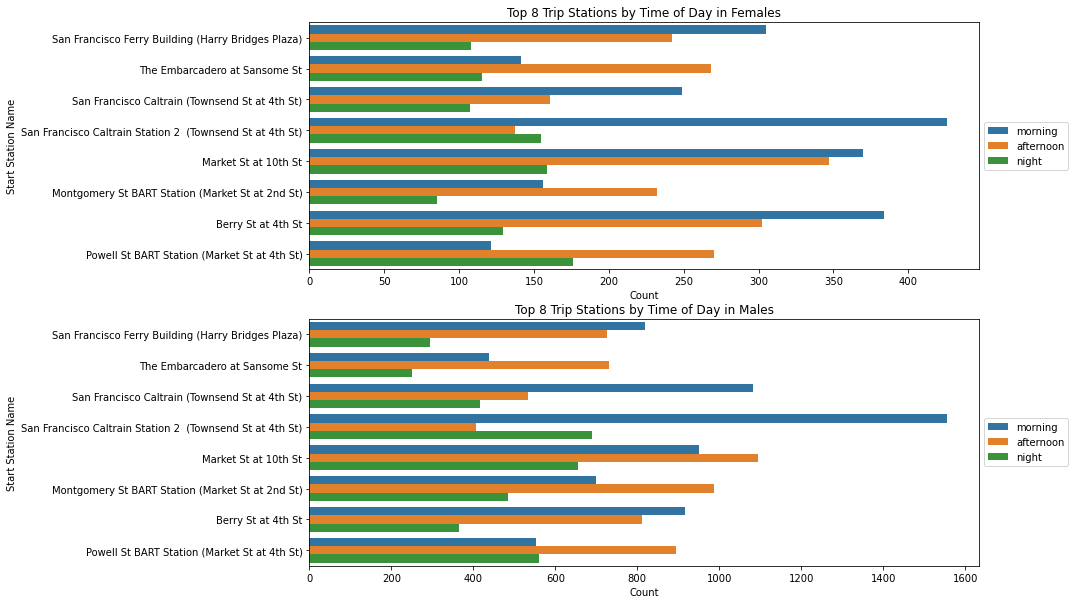

In [316]:
# (2) Top 8 trip stations by times in each gender
# 1. 3 categorical variables using countplot: Time of day
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sb.countplot(data=df_f, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Time of Day in Females')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=df_m, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Time of Day in Males')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

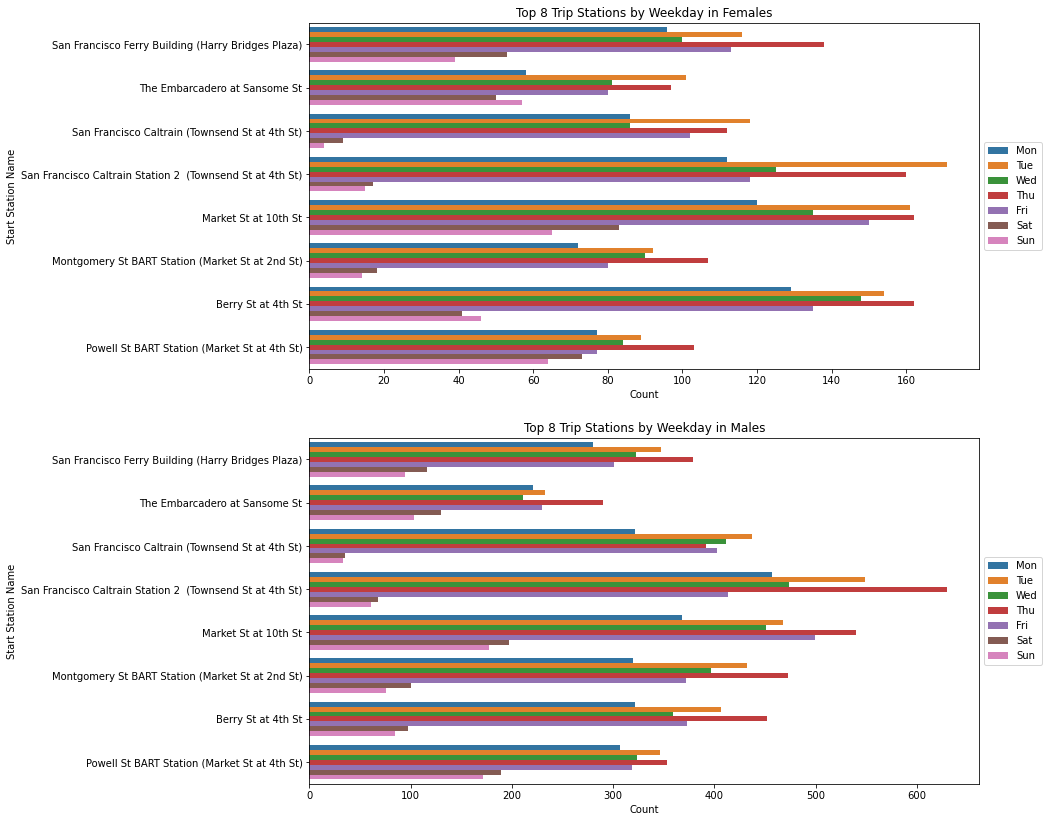

In [317]:
# 2. 3 categorical variables using countplot: Weekday
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=df_f, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Weekday in Females')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=df_m, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Weekday in Males')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

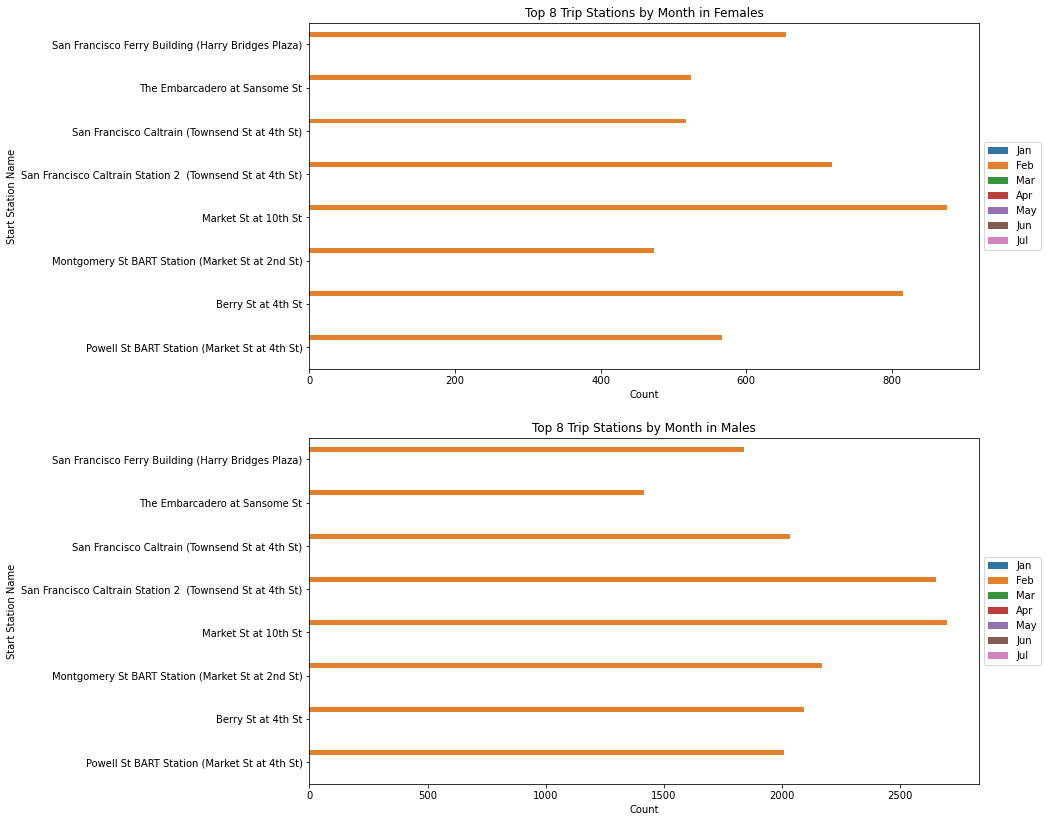

In [318]:
# 3. 3 categorical variables using countplot: Month
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=df_f, y='start_station_name', hue='start_month_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Month in Females')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=df_m, y='start_station_name', hue='start_month_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Month in Males')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

After checking time of day, weekdays, it is hard to tell any distinct trends between females and males. It needs to be investigated deeper and get more information.

In [319]:
# Station names are a little bit too long. Use station id instead for FacetGrid plots.
df_top8.groupby('start_station_name')['start_station_id'].value_counts()

start_station_name                                         start_station_id
San Francisco Ferry Building (Harry Bridges Plaza)         15.0                2710
The Embarcadero at Sansome St                              6.0                 2082
San Francisco Caltrain (Townsend St at 4th St)             30.0                2703
San Francisco Caltrain Station 2  (Townsend St at 4th St)  67.0                3544
Market St at 10th St                                       58.0                3904
Montgomery St BART Station (Market St at 2nd St)           21.0                2895
Berry St at 4th St                                         81.0                3052
Powell St BART Station (Market St at 4th St)               3.0                 2760
Name: start_station_id, dtype: int64

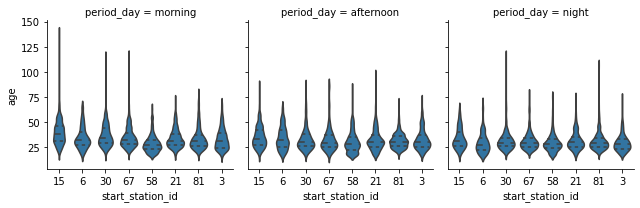

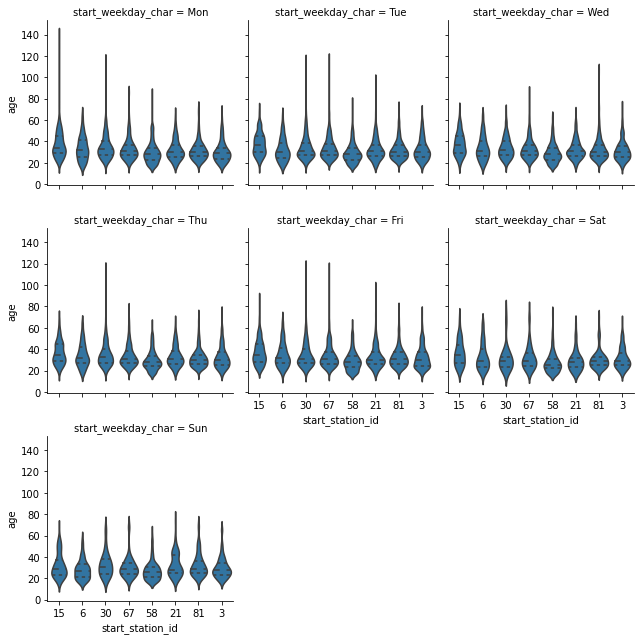

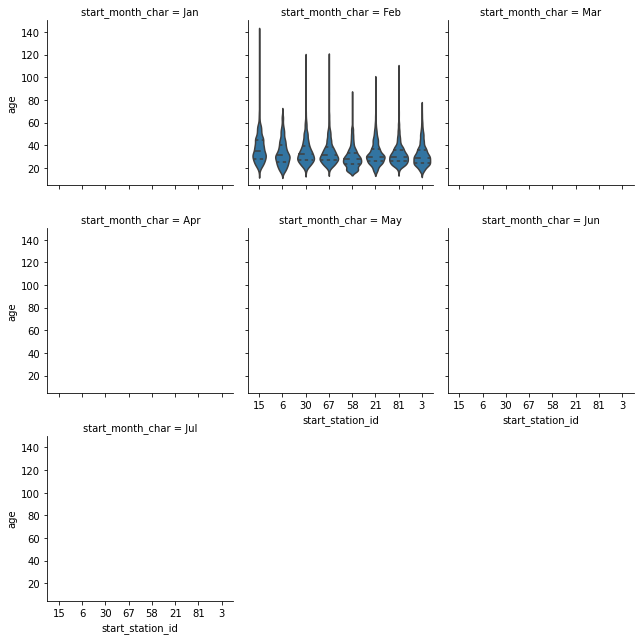

In [320]:
# (3) 2 Categorical variables and 1 numeric variable: too many groups here, 
# So separate them by using FacetGrid with Violin plot

# Top 8 trips station by times (time of day, weekdays, months) in age distribution
for i in range(1, 4):
    g = sb.FacetGrid(data=df_top8, col=times_chr[i-1], col_wrap=3)
    g.map(sb.violinplot,'start_station_id', 'age', inner='quartile', order=[15,6,30,67,58,21,81,3], color=base_color);

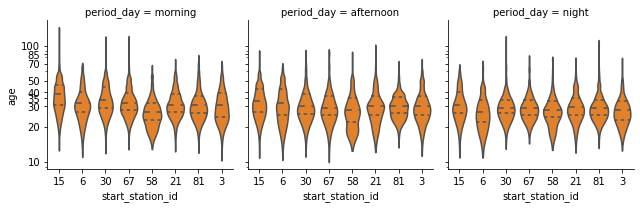

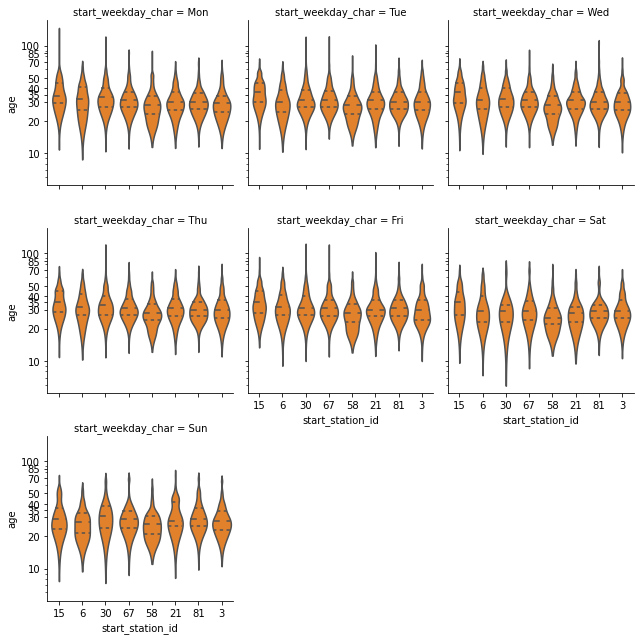

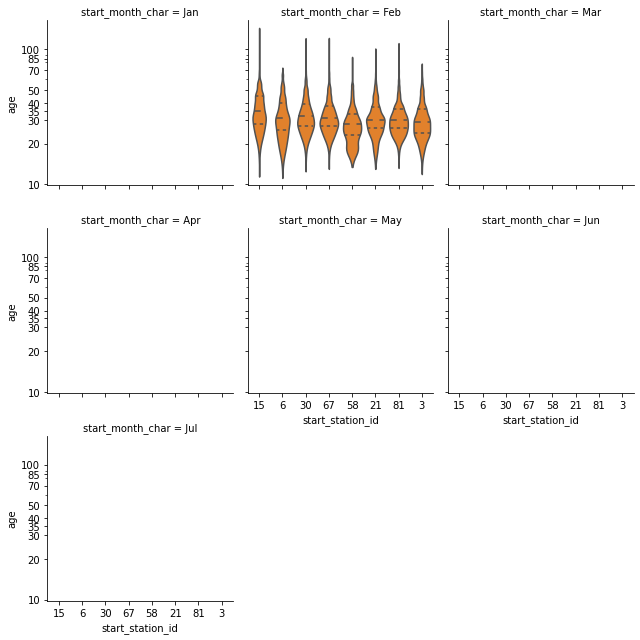

In [321]:
# (3) Top 8 trips station by times (period of day, weekdays, months) in log-transformed age distribution
base_color = sb.color_palette()[1]
for i in range(1, 4):
    g = sb.FacetGrid(data=df_top8, col=times_chr[i-1], col_wrap=3)
    g.map(sb.violinplot,'start_station_id', 'age', inner='quartile', order=[15,6,30,67,58,21,81,3], color=base_color)
    plt.yscale('log')
    plt.yticks([10,20,30,35,40,50,70,85,100], [10,20,30,35,40,50,70,85,100]);

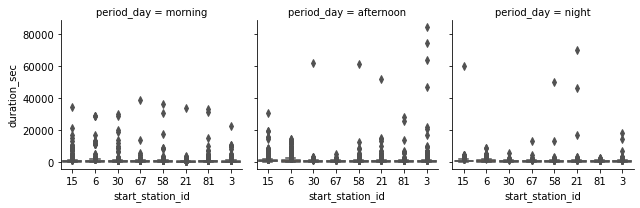

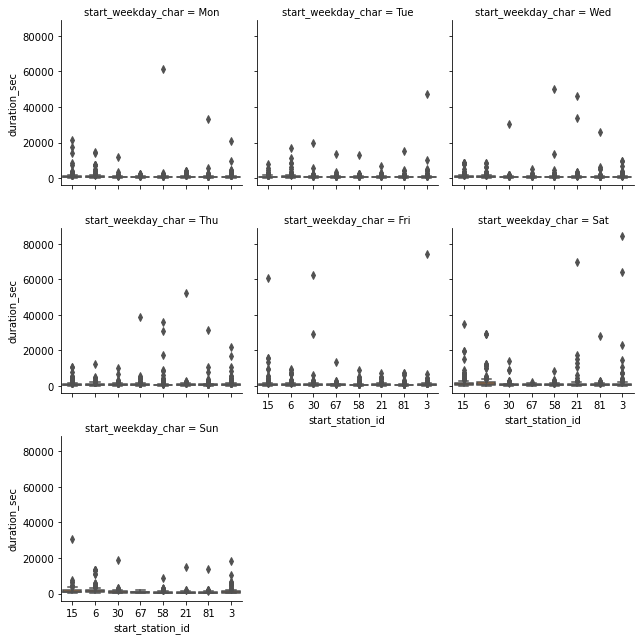

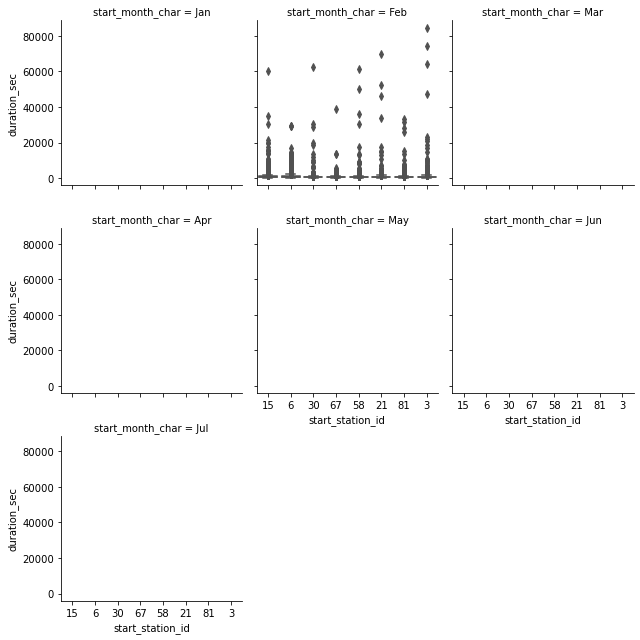

In [322]:
# (4) 2 Categorical variables and 1 numeric variable: too many groups here, 
# so separate them by using FacetGrid with Boxplot
# Top 8 trips station by times (time of day, weekdays, months) in duration of trips distribution
base_color = sb.color_palette()[1]
for i in range(1, 4):
    g = sb.FacetGrid(data=df_top8, col=times_chr[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id', 'duration_sec', order=[15,6,30,67,58,21,81,3], color=base_color);


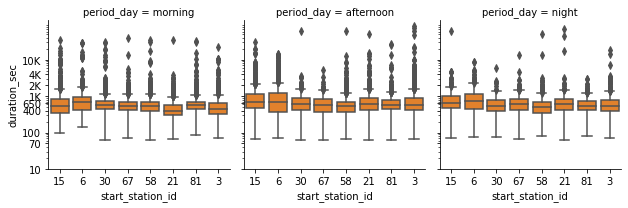

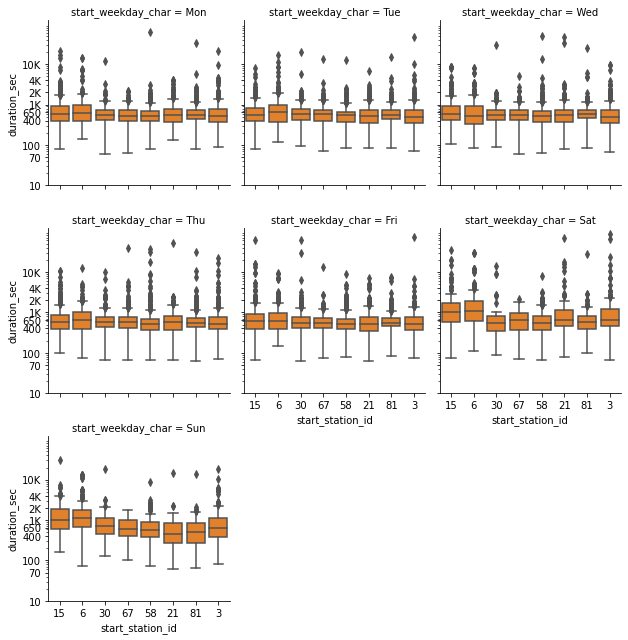

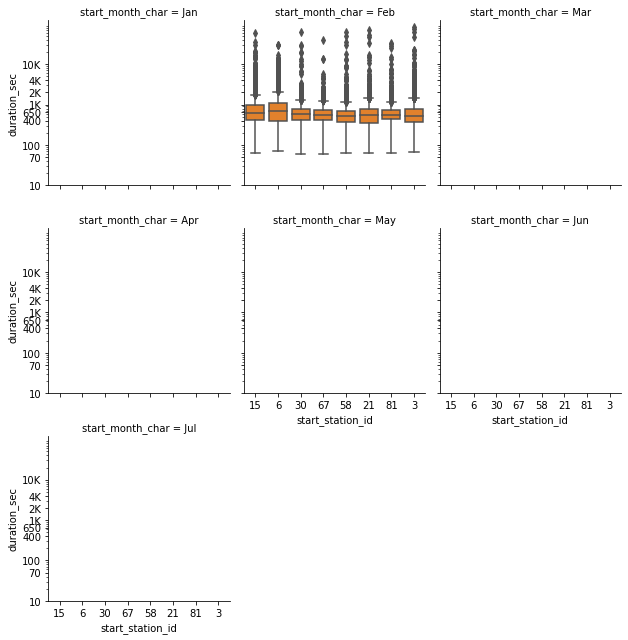

In [323]:
# Cannot observe the trends based on the above plots because they all sequeeze together. 
# So, let's see log-transformed for duration of trips
# (4) Top 8 trips station by times (period of day, weekdays, months) in log-transformed duration of trips distribution
base_color = sb.color_palette()[1]
for i in range(1, 4):
    g = sb.FacetGrid(data=df_top8, col=times_chr[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id', 'duration_sec', order=[15,6,30,67,58,21,81,3], color=base_color)
    plt.yscale('log')
    plt.yticks([10,50,100,400,650,1000,2000,4000,10000], [10,70,100,400,650,'1K','2K','4K','10K']);


After log transformed, the trips are longer at night, on Saturday and on Sunday. I am interested in if user types impact the duration of trips too.

In the age distribution, there are not big different in time and locations. Most medians of age fall between 30 and 40 years old.

<Figure size 432x288 with 0 Axes>

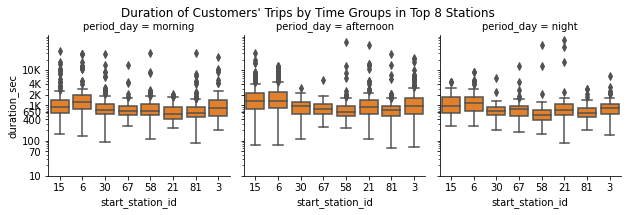

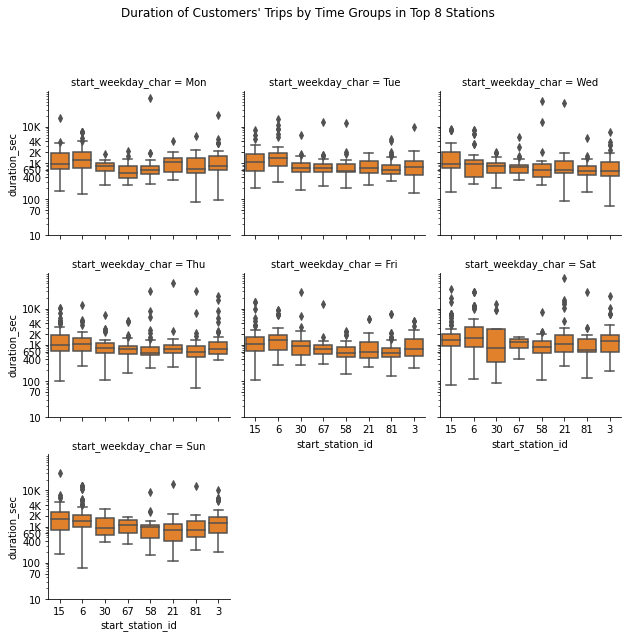

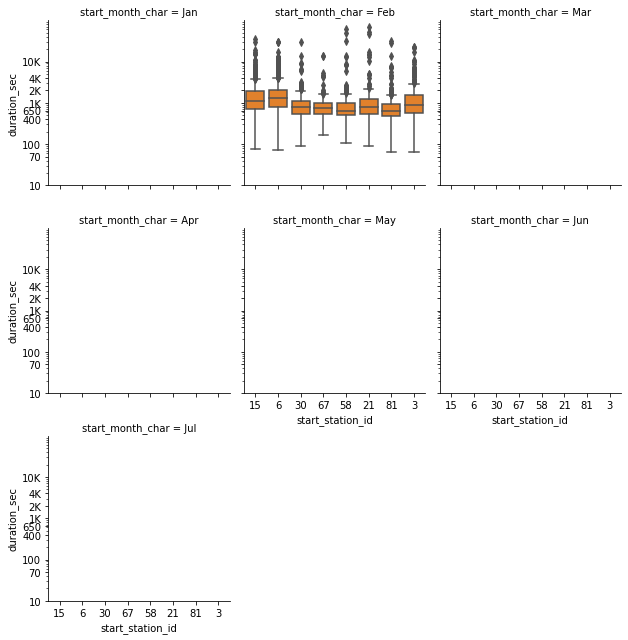

In [324]:
# Apparently, user types play an important role in the above plots. Let's see if it can make durations different.
# 3 Categorical variables and 1 numeric variables: Use FacetGrid and Boxplot here.
# (4) Top 8 trips station by times (time of day, weekdays, months) in log-transformed duration of trips distribution and in customers
base_color = sb.color_palette()[1]
for i in range(1, 4):
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle('Duration of Customers\' Trips by Time Groups in Top 8 Stations')
    g = sb.FacetGrid(data=df_cust, col=times_chr[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id', 'duration_sec', order=[15,6,30,67,58,21,81,3], color=base_color)
    plt.yscale('log')
    plt.yticks([10,50,100,400,650,1000,2000,4000,10000], [10,70,100,400,650,'1K','2K','4K','10K']);

After separating subscribers from customers, the median of duration of trips in customers is between 1000 and 2000 seconds. The trips at night and in December are longer.

<Figure size 432x288 with 0 Axes>

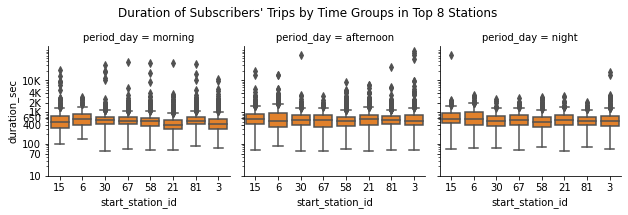

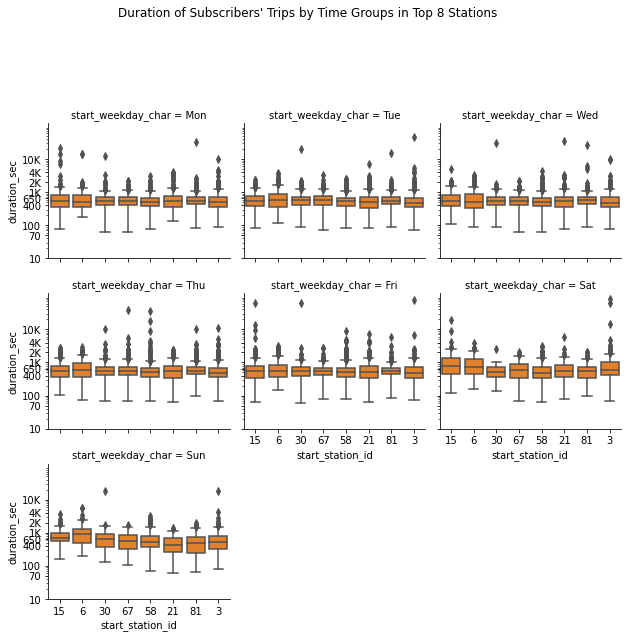

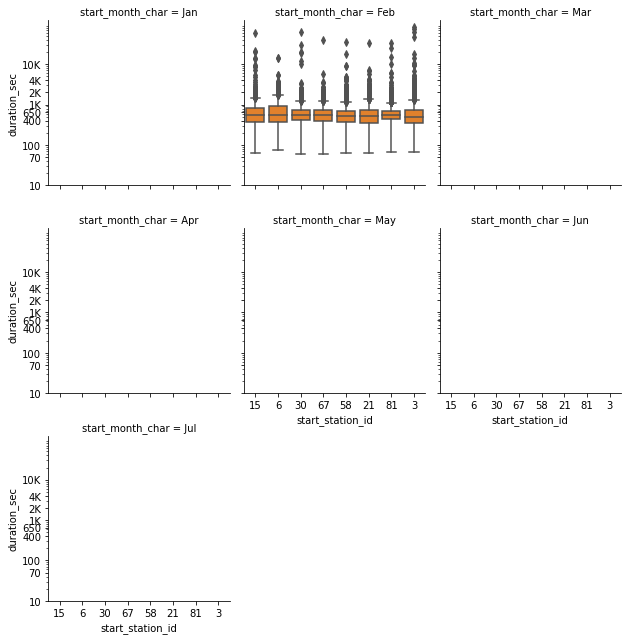

In [325]:
# Let's see subscribers!
# (4) Top 8 trips station by times (period of day, weekdays, months) in log-transformed duration of trips distribution and in subscribers
base_color = sb.color_palette()[1]

for i in range(1, 4):
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle('Duration of Subscribers\' Trips by Time Groups in Top 8 Stations')
    g = sb.FacetGrid(data=df_sub, col=times_chr[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id', 'duration_sec', order=[15,6,30,67,58,21,81,3], color=base_color)
    plt.yscale('log')
    plt.yticks([10,50,100,400,650,1000,2000,4000,10000], [10,70,100,400,650,'1K','2K','4K','10K']);

After separating customers from subscribers, the median of duration of trips falls between 650 and 1000 seconds. The duration of trips are longer at night and in December.

> Features strengthen each other in terms of looking at locations and times
Separating user types, customers and subscribers, displays more information from location and time. Customers might be tourists who like to ride a bike during the weekend and in the summer. Also, the number of trips increases in the tourist attractions like Ferry building and Embarcadero (close to piers). On the other hand, subscribers might be commuters. The trips in subscribers increase during the weekdays and after launching, the number of trips gradually increases and then decreases when the weather becomes colder.

> Interesting or surprising interactions between features
Based on the user types, the figures show us the significant trends. It also impacts the duration of trips. The median of duration of trips in customers (1000-2000 seconds) are longer than in subscribers (650 seconds).

Reference

Dataset,2017-fordgobike-tripdata.csv, https://s3.amazonaws.com/fordgobike-data/index.html
license https://assets.fordgobike.com/data-license-agreement.html